# Comp6481 / 8481 coursework 2024 

We will be working with data from https://www.kaggle.com/datasets/sethpoly/application-rejection-emails 

*Detect Reject Emails* by SethPoly@kaggle


# Part A

This notebook contains the questions for Part A of the practical coursework. 

Please ensure that this notebook is stored in a folder which also has the `Rejection Data - Sheet1.csv` data file

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

You are welcome to extend this notebook also for your Part B work, though you could also use a different notebook or python file. Please add any working for Part B at the end of this notebook if you wish to use this notebook for Part B work too.


**************************************************************************************
* Start of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
* The majority of code extracted from the original notebook is commented out below, but included for completeness
**************************************************************************************

# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Used to detect the rejection emails from jobs applied to.


In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
from gensim.models import Word2Vec
import nltk

df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [38]:
import string
import matplotlib.pyplot as plt
import nltk


# For the purposes of this assessment, all text processing actions in this cell have been removed except the replacement of newline characters by space characters

# convert email text to lowercase
#df.Email = df.Email.apply(lambda x: x.lower())
# remove punctuation
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
# remove numbers
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))
# remove newline tags
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


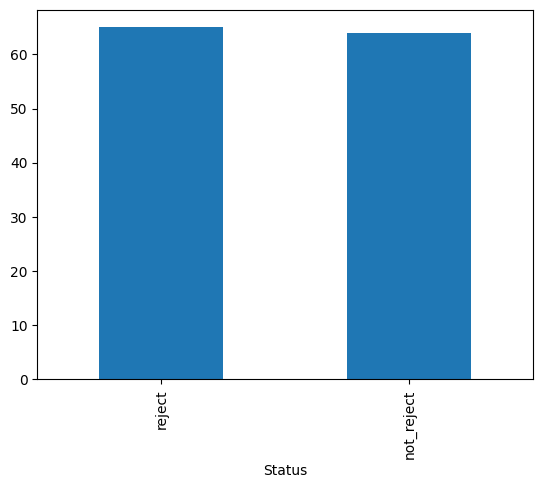

In [39]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [40]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [41]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report

# pull data into vectors to create collection of text/tokens
#vectorizer = CountVectorizer()
#x = vectorizer.fit_transform(df.Email)

#encoder = LabelEncoder()
#y = encoder.fit_transform(df.Status)

# split into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of sets
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

In [42]:
#%%time
#nb = MultinomialNB()
#nb.fit(x_train, y_train)

In [43]:
#def predict_reject(email):
#    category_names = {'reject':'reject','not_reject':'not-reject'}
#    cod = nb.predict(vectorizer.transform([email]))
#    return category_names[encoder.inverse_transform(cod)[0]]

#print(predict_reject('Unfortunately we will not be moving forward'))
#print(predict_reject('I found some job listings you may be interested in'))
#print(predict_reject('We were very fortunate to have a strong group of applicants to consider for this role and have recently filled this position. Unfortunately, because this role is no longer available, we will not be moving forward with your application.'))
#print(predict_reject(''))


In [44]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

# Init the classfifier
#clf = OneVsRestClassifier(LogisticRegression())

# Fit classifier to training data
#clf.fit(x_train, y_train)

# Print accuracy
#print(f'Accuracy: {clf.score(x_test, y_test)}')

In [45]:
#x_test_clv_pred = clf.predict(x_test)
#confusion_matrix(y_test, x_test_clv_pred)
#print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

 - Inspiration and code samples from https://towardsdatascience.com/i-built-a-reject-not-reject-email-classifier-for-my-job-applications-844a3b6cd67e

**************************************************************************************
* End of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
**************************************************************************************

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1 [2 marks]

Add a column to the `df` data frame named `Length`, which holds the number of tokens in the tokenised list representing that email (i.e. the number of items in the list in `df.Tokens` for each row)

In [46]:
# Answer to Q1
length = df.Tokens.apply(lambda x: len(x)) # Gets the length of the Tokens
df["Length"] = length # makes a new column called length containing the length of the tokens
df # prints the df

,Email,Status,Tokens,Length
0,Thank you for applying to the Junior Software ...,reject,"[Thank, you, for, applying, to, the, Junior, S...",39
1,Thank you for your interest in the Train To Hi...,reject,"[Thank, you, for, your, interest, in, the, Tra...",47
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, Thank, you, for, your, interest, in, ...",139
3,Thank you for your interest in the Software En...,reject,"[Thank, you, for, your, interest, in, the, Sof...",49
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[Hi, Seth, ,, Thank, you, for, your, interest,...",81
...,...,...,...,...
124,"Starting March 17, 2021, eBay will no longer ...",not_reject,"[Starting, March, 17, ,, 2021, ,, eBay, will, ...",133
125,"Hi Seth, I want to make finding a great remot...",not_reject,"[Hi, Seth, ,, I, want, to, make, finding, a, g...",87
126,"Hello Seth, I just wanted to take a second to...",not_reject,"[Hello, Seth, ,, I, just, wanted, to, take, a,...",58
127,Your free YouMail plan includes 20 in-app tran...,not_reject,"[Your, free, YouMail, plan, includes, 20, in-a...",34


In [47]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
#print(df['Length'])

## Q2. 

### Q2a [2 marks] 

Choose an appropriate visualisation to create a visualisation of the Length and Status data in `df`, after you have completed Q1.

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:

https://matplotlib.org/stable/plot_types/basic/index.html
https://realpython.com/pandas-plot-python/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
https://www.w3schools.com/python/matplotlib_intro.asp

### Q2b [2 marks] 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising.

Add a comment answering the question: "Do you see any patterns in your visualisation of the data frame data on email Length and email Status?"

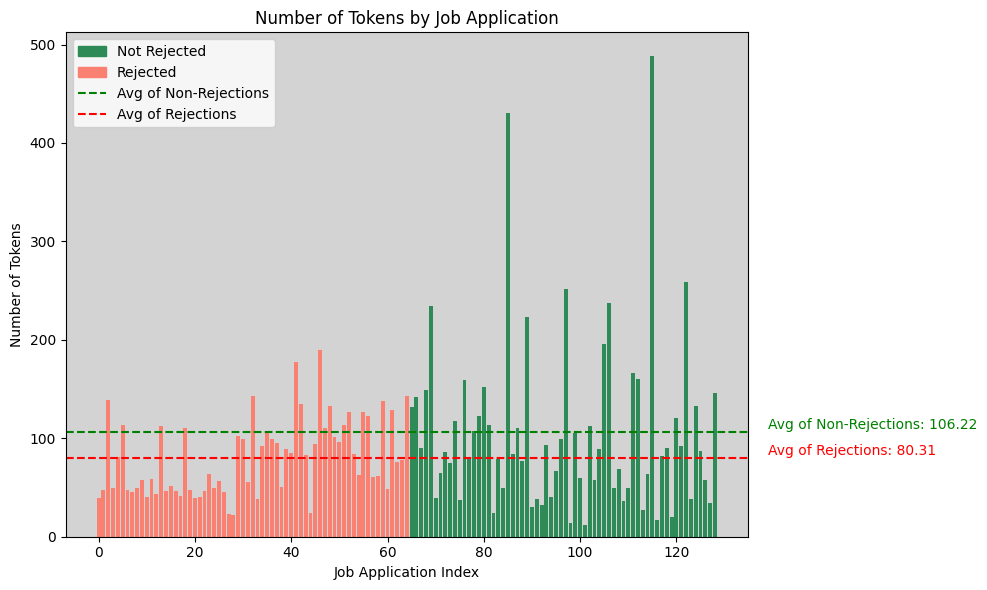

In [48]:
import matplotlib.pyplot as plt

# Calculate average token length for non-rejected and rejected job applications
avg_length_non_reject = df[df['Status'] == 'not_reject']['Length'].mean()
avg_length_reject = df[df['Status'] == 'reject']['Length'].mean()

# Define colors based on the 'Status' column
colors = ['seagreen' if status == 'not_reject' else 'salmon' for status in df['Status']]

# Create a bigger figure
plt.figure(figsize=(10, 6))

# Create bar chart for number of tokens
plt.bar(df.index, df['Length'], color=colors)
plt.title("Number of Tokens by Job Application")
plt.xlabel("Job Application Index")
plt.ylabel("Number of Tokens")

# Overlay average token length for non-rejected and rejected
plt.axhline(y=avg_length_non_reject, color='green', linestyle='--', label=f'Avg of Non-Rejections: {avg_length_non_reject:.2f}')
plt.axhline(y=avg_length_reject, color='red', linestyle='--', label=f'Avg of Rejections: {avg_length_reject:.2f}')

# Set light grey background
plt.gca().set_facecolor('lightgrey')

# Add a new legend for the colored bars
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='seagreen'), plt.Rectangle((0,0),1,1, color='salmon'), plt.Line2D([0], [0], linestyle='--', color='green'), plt.Line2D([0], [0], linestyle='--', color='red')],
           labels=['Not Rejected', 'Rejected','Avg of Non-Rejections','Avg of Rejections'], loc='upper left')

# Add text annotations for average numbers
plt.text(139, avg_length_non_reject, f'Avg of Non-Rejections: {avg_length_non_reject:.2f}', color='green', ha='left', va='bottom')
plt.text(139, avg_length_reject, f'Avg of Rejections: {avg_length_reject:.2f}', color='red', ha='left', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


Write your answer to Q2b here:

#### Why I chose this visualisation?

Looking at the dataframe intially, I noticed that rejections had less tokens than non rejections.
I also hypothesised this as from my experience rejections are shorter and simpler, wheras non rejections have follow up meeting times, interview discussions and more details in general toward the applicant.

Therefore I chose a bar chart to show the relationship between the number of tokens and whether the candidate was rejected or not.
I also use a dotted line to show you the average's for rejected and non rejected emails.
This was to show overall rejection emails were shorter than non rejection emails
We can use the legend to depict this fully.

The status is boolean data, and the tokens are numerical data.

#### Do I see any patterns in your visualisation of the data frame data on email Length and email Status?

Email status and email length are related as can be seen in the bar chart.
The average token length for rejections was much less than for non rejections.

This agrees with my hypothesis


In [49]:
# Answer for Q3
import pandas as pd

# Assuming df contains the dataset with emails and tokens

# Convert tokens to lowercase strings
tokens_lower = df['Tokens'].apply(lambda x: [token.lower() for token in x])

# Calculate lexical richness for each email
df['LexRich'] = tokens_lower.apply(lambda x: len(set(x)) / len(x))

# Display the DataFrame
df




,Email,Status,Tokens,Length,LexRich
0,Thank you for applying to the Junior Software ...,reject,"[Thank, you, for, applying, to, the, Junior, S...",39,0.820513
1,Thank you for your interest in the Train To Hi...,reject,"[Thank, you, for, your, interest, in, the, Tra...",47,0.765957
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, Thank, you, for, your, interest, in, ...",139,0.640288
3,Thank you for your interest in the Software En...,reject,"[Thank, you, for, your, interest, in, the, Sof...",49,0.673469
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[Hi, Seth, ,, Thank, you, for, your, interest,...",81,0.666667
...,...,...,...,...,...
124,"Starting March 17, 2021, eBay will no longer ...",not_reject,"[Starting, March, 17, ,, 2021, ,, eBay, will, ...",133,0.533835
125,"Hi Seth, I want to make finding a great remot...",not_reject,"[Hi, Seth, ,, I, want, to, make, finding, a, g...",87,0.724138
126,"Hello Seth, I just wanted to take a second to...",not_reject,"[Hello, Seth, ,, I, just, wanted, to, take, a,...",58,0.758621
127,Your free YouMail plan includes 20 in-app tran...,not_reject,"[Your, free, YouMail, plan, includes, 20, in-a...",34,0.794118


## Q3. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

[We have also defined a second measure: how many times, on average, is each token used in the text? We will *not* use that measure here.]

Add a column to the data frame `df` named `LexRich`, which calculates the lexical richness for each email in the dataset.



In [50]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
#print(df['LexRich'])

## Q4. 

For Q4a and Q4b, note that we can access all the data in df with the Status = 'reject', using this code:

print(df[df.Status=='reject'])

###  Q4a: [4 marks] 

Calculate two variables, `lex_reject` and `lex_not_reject`
* `lex_reject' = the mean lexical richness for the `reject' emails
* `lex_not_reject' = the mean lexical richness for the `not_reject' emails

###  Q4b: [2 marks] 
Comment briefly on the difference: what does this tell us about how the variety of vocabulary use differs between reject emails and not_reject emails? [approx 2-4 sentences]

In [51]:
# We can access all the data in df with the Status = 'reject', using this code:
# print(df[df.Status=='reject'])

In [52]:
# Answer for Q4a
lex_reject = df[df.Status == 'reject']['LexRich'].mean()
lex_not_reject = df[df.Status == 'not_reject']['LexRich'].mean()

print("Mean Lexical Richness for Reject Emails:", lex_reject)
print("Mean Lexical Richness for Not Reject Emails:", lex_not_reject)

Mean Lexical Richness for Reject Emails: 0.7115720169244959
Mean Lexical Richness for Not Reject Emails: 0.7039732336736371


In [53]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
#print(lex_reject)
#print(lex_not_reject)

Write your answer for Q4b here: 

The difference in mean lexical richness between "reject" emails 0.7115720169244959 and "not_reject" emails 0.7039732336736371 is minimal, suggesting that there is little difference in the variety of vocabulary use between the two types of emails. 

Both types of emails show a similar level of lexical diversity. This means vocabulary use does not really vary based on the rejection status. This suggests lexical richness alone may not be a distinguishing factor in predicting whether an email will be rejected or not.


## Q5. [4 marks]

Train a Word2Vec model called `model` using the following input parameters:
* `sentences` as the data in `df.Tokens`
* a `vector_size` of 100
* a `window` of 5
* a `min_count` of 1
* a `workers` of 4

Using your Word2Vec `model`, list the top 20 most similar tokens to the token `developer`.

In [54]:
# Answer to Q5 
model = Word2Vec(sentences=df['Tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Find most similar tokens to 'developer'
similar_tokens = model.wv.most_similar('developer', topn=20)

print("Top 20 most similar tokens to 'developer':")
for simtoks in similar_tokens:
    print(simtoks)

Top 20 most similar tokens to 'developer':
('1', 0.9167407751083374)
('want', 0.913617730140686)
('move', 0.9123094081878662)
('visit', 0.9114162921905518)
('reviewed', 0.9111514091491699)
('any', 0.9110127687454224)
('ago', 0.9107088446617126)
('been', 0.9107040166854858)
('but', 0.9104273319244385)
('clients', 0.9104102253913879)
('what', 0.9102947115898132)
('consider', 0.9101496338844299)
('experience', 0.90993332862854)
('also', 0.9098001718521118)
('one', 0.909782886505127)
('position', 0.9097716808319092)
('success', 0.9096686840057373)
('how', 0.9096391797065735)
('fit', 0.9096362590789795)
('do', 0.9096046686172485)


# End of Part A

If you wish to use this notebook for any code or calculations for Part B, please do so by adding cells below here.

# Are there additional pre-processing steps you could perform on data that might be helpful?
## PART B 1.1 Using .lower()

The first thing I believe that could have been improved here is the data processing.

I had to use the .lower() function above when generating Lexical Richness.

It would have been better to apply this to the dataframe first like so:

In [55]:
lowered_Tokens = df['Tokens'].apply(lambda x: [token.lower() for token in x])
df.Tokens = lowered_Tokens
df

,Email,Status,Tokens,Length,LexRich
0,Thank you for applying to the Junior Software ...,reject,"[thank, you, for, applying, to, the, junior, s...",39,0.820513
1,Thank you for your interest in the Train To Hi...,reject,"[thank, you, for, your, interest, in, the, tra...",47,0.765957
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, thank, you, for, your, interest, in, ...",139,0.640288
3,Thank you for your interest in the Software En...,reject,"[thank, you, for, your, interest, in, the, sof...",49,0.673469
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[hi, seth, ,, thank, you, for, your, interest,...",81,0.666667
...,...,...,...,...,...
124,"Starting March 17, 2021, eBay will no longer ...",not_reject,"[starting, march, 17, ,, 2021, ,, ebay, will, ...",133,0.533835
125,"Hi Seth, I want to make finding a great remot...",not_reject,"[hi, seth, ,, i, want, to, make, finding, a, g...",87,0.724138
126,"Hello Seth, I just wanted to take a second to...",not_reject,"[hello, seth, ,, i, just, wanted, to, take, a,...",58,0.758621
127,Your free YouMail plan includes 20 in-app tran...,not_reject,"[your, free, youmail, plan, includes, 20, in-a...",34,0.794118


It also would be beneficial to have a column with tokens that have key words only without words like 'and' and 'the'

## PART B 1.11 Removing stopwords

In [56]:
import pandas as pd

# Assuming your dataframe is called df and it has a column called 'Tokens'
stopwords = ['and', 'the', 'you', 'your','to', 'we', 'for', 'in','at', 'with', 'a', 'this', '.', ',',':','of','-','if', 'are', 'will', 'be','that','an','or','on','our','as','is']

# Using list comprehension to remove stopwords and assign the result to a new column
df = df.assign(TokenKeywords=[[word for word in row if word not in stopwords] for row in df.Tokens])

In [57]:
df

,Email,Status,Tokens,Length,LexRich,TokenKeywords
0,Thank you for applying to the Junior Software ...,reject,"[thank, you, for, applying, to, the, junior, s...",39,0.820513,"[thank, applying, junior, software, developer,..."
1,Thank you for your interest in the Train To Hi...,reject,"[thank, you, for, your, interest, in, the, tra...",47,0.765957,"[thank, interest, train, hire, junior, softwar..."
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, thank, you, for, your, interest, in, ...",139,0.640288,"[eth, thank, interest, exyn, applying, apart, ..."
3,Thank you for your interest in the Software En...,reject,"[thank, you, for, your, interest, in, the, sof...",49,0.673469,"[thank, interest, software, engineer, position..."
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[hi, seth, ,, thank, you, for, your, interest,...",81,0.666667,"[hi, seth, thank, interest, pathai, !, unfortu..."
...,...,...,...,...,...,...
124,"Starting March 17, 2021, eBay will no longer ...",not_reject,"[starting, march, 17, ,, 2021, ,, ebay, will, ...",133,0.533835,"[starting, march, 17, 2021, ebay, no, longer, ..."
125,"Hi Seth, I want to make finding a great remot...",not_reject,"[hi, seth, ,, i, want, to, make, finding, a, g...",87,0.724138,"[hi, seth, i, want, make, finding, great, remo..."
126,"Hello Seth, I just wanted to take a second to...",not_reject,"[hello, seth, ,, i, just, wanted, to, take, a,...",58,0.758621,"[hello, seth, i, just, wanted, take, second, t..."
127,Your free YouMail plan includes 20 in-app tran...,not_reject,"[your, free, youmail, plan, includes, 20, in-a...",34,0.794118,"[free, youmail, plan, includes, 20, in-app, tr..."



# While you were doing Part A, did anything come to your mind about patterns you were seeing?
# What can we learn if we group the data together in different ways? Does this give us more useful information?

## PART B 1.2 Grouping Full Stops with Status


While doing part A I noticed how the average token length for rejections was over 25 tokens shorter which was substantial.

I felt like something further I could also explore because of this was the average number of sentences per email for rejection emails compared to non rejection emails.

To find this out I just need the number of fullstops in the token sequence.
This method isnt full proof however, because full stops may be used in other areas than to end sentences, but it seemed like an interesting thing to explore.

In [58]:
# Count the number of full stops in each token and create a new column
df['NumFullStops'] = df.Tokens.apply(lambda x: x.count('.'))

# Display the DataFrame to verify the new column
df


,Email,Status,Tokens,Length,LexRich,TokenKeywords,NumFullStops
0,Thank you for applying to the Junior Software ...,reject,"[thank, you, for, applying, to, the, junior, s...",39,0.820513,"[thank, applying, junior, software, developer,...",2
1,Thank you for your interest in the Train To Hi...,reject,"[thank, you, for, your, interest, in, the, tra...",47,0.765957,"[thank, interest, train, hire, junior, softwar...",2
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, thank, you, for, your, interest, in, ...",139,0.640288,"[eth, thank, interest, exyn, applying, apart, ...",6
3,Thank you for your interest in the Software En...,reject,"[thank, you, for, your, interest, in, the, sof...",49,0.673469,"[thank, interest, software, engineer, position...",2
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[hi, seth, ,, thank, you, for, your, interest,...",81,0.666667,"[hi, seth, thank, interest, pathai, !, unfortu...",4
...,...,...,...,...,...,...,...
124,"Starting March 17, 2021, eBay will no longer ...",not_reject,"[starting, march, 17, ,, 2021, ,, ebay, will, ...",133,0.533835,"[starting, march, 17, 2021, ebay, no, longer, ...",6
125,"Hi Seth, I want to make finding a great remot...",not_reject,"[hi, seth, ,, i, want, to, make, finding, a, g...",87,0.724138,"[hi, seth, i, want, make, finding, great, remo...",3
126,"Hello Seth, I just wanted to take a second to...",not_reject,"[hello, seth, ,, i, just, wanted, to, take, a,...",58,0.758621,"[hello, seth, i, just, wanted, take, second, t...",3
127,Your free YouMail plan includes 20 in-app tran...,not_reject,"[your, free, youmail, plan, includes, 20, in-a...",34,0.794118,"[free, youmail, plan, includes, 20, in-app, tr...",2


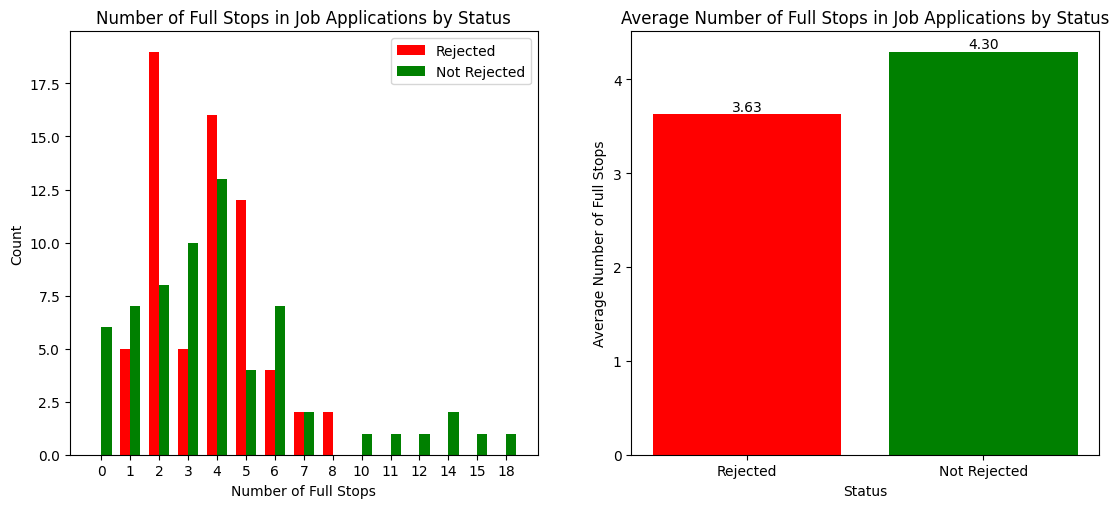

In [59]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'NumFullStops' and 'Status', then count occurrences
full_stops_grouped = df.groupby(['NumFullStops', 'Status']).size().unstack(fill_value=0)

# Calculate the width of each bar
bar_width = 0.35

# Calculate the position for each group
positions = range(len(full_stops_grouped.index))

# Create the figure with specified size
plt.figure(figsize=(12, 6))

# Create the first subplot for the grouped bar chart
plt.subplot(1, 2, 1)

# Plot the red bars
plt.bar(positions, full_stops_grouped['reject'], width=bar_width, color='red', label='Rejected')

# Plot the green bars shifted to the right
plt.bar([pos + bar_width for pos in positions], full_stops_grouped['not_reject'], width=bar_width, color='green', label='Not Rejected')

# Add title and labels
plt.title("Number of Full Stops in Job Applications by Status")
plt.xlabel("Number of Full Stops")
plt.ylabel("Count")
plt.xticks([pos + bar_width/2 for pos in positions], full_stops_grouped.index, rotation=0)
plt.legend()

# Create the second subplot for the bar chart showing average number of full stops
plt.subplot(1, 2, 2)

# Calculate the average number of full stops for rejected and non-rejected emails
avg_fullstops_reject = df[df['Status'] == 'reject']['NumFullStops'].mean()
avg_fullstops_not_reject = df[df['Status'] == 'not_reject']['NumFullStops'].mean()

# Create lists for bar chart
statuses = ['Rejected', 'Not Rejected']
avg_fullstops = [avg_fullstops_reject, avg_fullstops_not_reject]

# Plot the bar chart
plt.bar(statuses, avg_fullstops, color=['red', 'green'])
plt.title("Average Number of Full Stops in Job Applications by Status")
plt.xlabel("Status")
plt.ylabel("Average Number of Full Stops")

# Show the actual numbers on the bars
for i, v in enumerate(avg_fullstops):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout to provide more space between subplots
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()


Here we can see on average there are more full stops / sentences for the non rejected emails, which corroborates with our earlier findings

# How do the frequency distributions compare for rejection emails compared to non-rejection emails? Any interesting observations?

## PART B 1.3 Frequency distributions

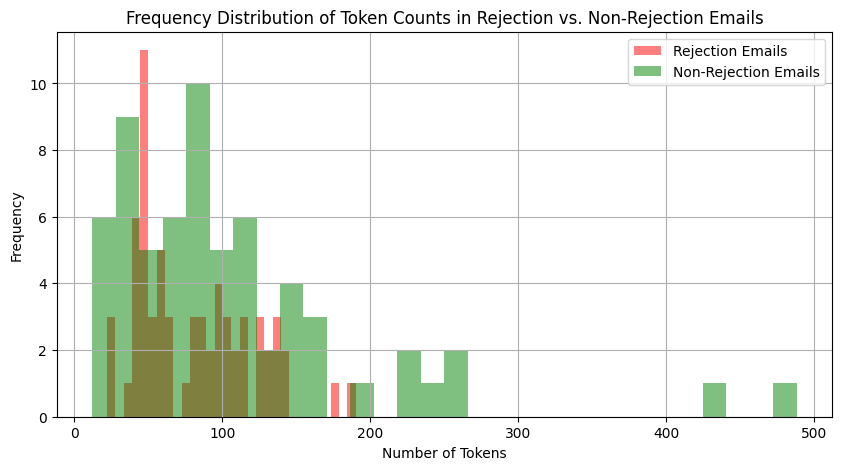

In [60]:
import matplotlib.pyplot as plt

# Filter the DataFrame for rejection and non-rejection emails
reject_emails = df[df['Status'] == 'reject']
non_reject_emails = df[df['Status'] == 'not_reject']

# Plot histograms for the number of tokens in rejection and non-rejection emails
plt.figure(figsize=(10, 5))
plt.hist(reject_emails['Length'], bins=30, alpha=0.5, color='red', label='Rejection Emails')
plt.hist(non_reject_emails['Length'], bins=30, alpha=0.5, color='green', label='Non-Rejection Emails')
plt.title('Frequency Distribution of Token Counts in Rejection vs. Non-Rejection Emails')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


As can be seen above, the majority of the tokens for rejections are less than for the non rejections.

# What happens if you conduct sentiment analysis?
## PART B 1.4 Word analysis

Having being rejected from many jobs myself :'), I feel like an interesting pattern I noticed:

Apologetic words being used in rejection emails such as: 'Sorry', 'Unfortunately', 'Regret' etc 


So, to investigate this I first got chatGPT to generate A top 10 list of (making sure to include some of the words i think would be relevant) Apologetic words in a job rejection email.





In [61]:
chatGPT_Apologetic = ["apologies","regret","sorry","disappoint","regretfully","unfortunately","apologize","apologise","regrettable","sadly"]

### The number of times an apologetic word was used in an email

In [62]:
# Initialise counter
j = 0  # Number of occurrences of apologetic words

# Iterate through apologetic words
for apologetic_word in chatGPT_Apologetic:
    # Normalize capitalization
    apologetic_word = apologetic_word.lower()
    
    # Iterate through tokens
    for token_list in df.Tokens:
        for token in token_list:
            # Normalize capitalization
            token = token.lower()
            
            # Check if token matches apologetic word
            if apologetic_word == token:
                j += 1

# Calculate frequency
frequency = j


In [63]:
print ('The number of times an apologetic word is mentioned in all the emails is', frequency)

The number of times an apologetic word is mentioned in all the emails is 56


In [64]:
# Initialize counter
k = 0  # Number of occurrences of apologetic words
l=0
# Iterate through apologetic words
for apologetic_word in chatGPT_Apologetic:
    # Normalize capitalization
    apologetic_word = apologetic_word.lower()
    
    # Iterate through tokens of rejected job applications
    for token_list, status in zip(df.Tokens, df.Status):
        if status == 'reject':  # Check if the status is 'reject'
            for token in token_list:
                # Normalize capitalization
                token = token.lower()
                
                # Check if token matches apologetic word
                if apologetic_word == token:
                    k += 1
        if status == 'not_reject':  # Check if the status is 'not_reject'
            for token in token_list:
                # Normalize capitalization
                token = token.lower()
                
                # Check if token matches apologetic word
                if apologetic_word == token:
                    l += 1

# Calculate frequency
rejections = k  # Number of occurrences of apologetic words in rejected job applications
non_rejections = l

In [65]:
print ('The number of times an apologetic word is mentioned in all the rejection emails is', rejections)
print ('The number of times an apologetic word is mentioned in all the non_rejection emails is', non_rejections)

The number of times an apologetic word is mentioned in all the rejection emails is 56
The number of times an apologetic word is mentioned in all the non_rejection emails is 0


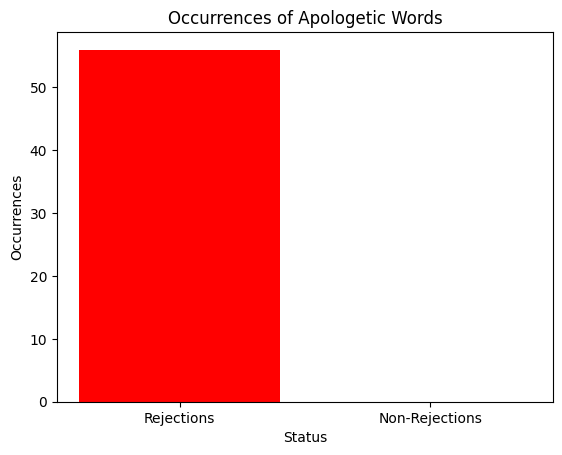

In [66]:
import matplotlib.pyplot as plt

# Data
categories = ['Rejections', 'Non-Rejections']
counts = [rejections, non_rejections]

# Create bar chart
plt.bar(categories, counts, color=['red', 'blue'])
plt.title('Occurrences of Apologetic Words')
plt.xlabel('Status')
plt.ylabel('Occurrences')
plt.show()


This is a clear indication that the words in the chatGPT_Apologetic are correlated to rejection emails ONLY.

Because of this we can look further by checking how many of the rejection emails contain a chatGPT_Apologetic word to see a percentage of how many rejection emails are detected using this set of words. 

If it is a high number then this would be a good way of detecting whether or not an email is a rejection email or not.


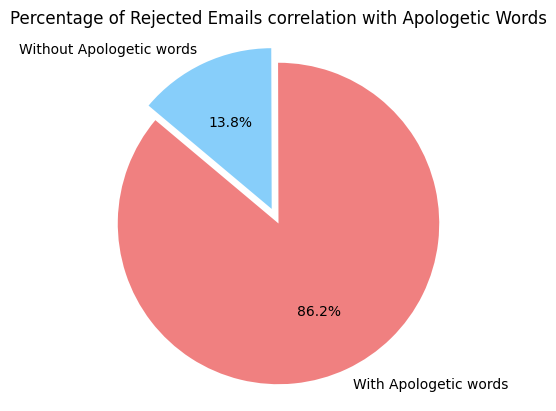

In [67]:
import matplotlib.pyplot as plt

# Lowercase tokens in the DataFrame
df['Tokens'] = df['Tokens'].apply(lambda x: [token.lower() for token in x])

# Lowercase words in chatGPT_Apologetic
chatGPT_Apologetic_lower = [word.lower() for word in chatGPT_Apologetic]

# Initialize counters
total_rejections = 0  # Total number of rejected emails
rejections_with_apology = 0  # Number of rejected emails containing at least one apologetic word

# Iterate through tokens of rejected job applications
for token_list, status in zip(df.Tokens, df.Status):
    if status == 'reject':  # Check if the status is 'reject'
        total_rejections += 1  # Increment total rejected emails counter
        # Check if any token in the token list is an apologetic word
        if any(token in chatGPT_Apologetic_lower for token in token_list):
            rejections_with_apology += 1  # Increment counter if at least one apologetic word is found

# Calculate percentage
if total_rejections > 0:
    percentage_with_apology = (rejections_with_apology / total_rejections) * 100
    percentage_without_apology = 100 - percentage_with_apology
else:
    percentage_with_apology = 0
    percentage_without_apology = 0

# Pie chart data
labels = ['With Apologetic words', 'Without Apologetic words']
sizes = [percentage_with_apology, percentage_without_apology]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice (with apology)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Rejected Emails correlation with Apologetic Words')
plt.show()


This is a strong indicator that rejection emails contain apologetic words (defined by myself and chaptGPT).
This means we can use this list to determine if an email is a rejection or not

# Word Analysis 1.41
## PART B Looking for the 10 most popular words in rejection emails

Another exploration I underwent was looking for the 10 most popular words in rejection emails and then seeing how many times they appeared in both rejection and not_rejection emails.

In [68]:
rejectionTokenList = df.groupby("Status")["TokenKeywords"].sum()

reject_tokens = rejectionTokenList["reject"]
non_reject_tokens = rejectionTokenList["not_reject"]


In [69]:
from collections import Counter

def get_top_ten_common_words(tokens):
    word_counts = Counter(tokens)
    return word_counts.most_common(10)

top_ten_reject_words = get_top_ten_common_words(reject_tokens)
top_ten_non_reject_words = get_top_ten_common_words(non_reject_tokens)

print("Top ten most common reject words:")
for word, count in top_ten_reject_words:
    print(f"{word}: {count}")

Top ten most common reject words:
interest: 79
thank: 68
position: 58
time: 56
unfortunately: 53
not: 53
software: 47
have: 44
application: 35
forward: 34


We can see that there were a few apologetic terms such as unfortunately & not present.

This suggests that the hypothesis that apologetic words are used in the rejection emails is true.

In [70]:
print ('The number of times an apologetic word is mentioned in all the rejection emails is', rejections)
print ('The number of times an apologetic word is mentioned in all the non_rejection emails is', non_rejections)

The number of times an apologetic word is mentioned in all the rejection emails is 56
The number of times an apologetic word is mentioned in all the non_rejection emails is 0


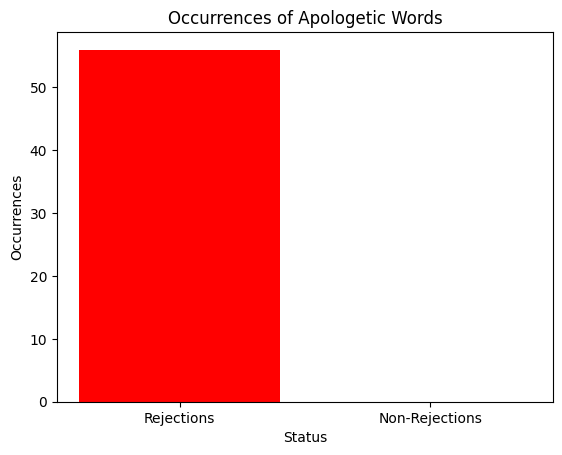

In [71]:
import matplotlib.pyplot as plt

# Data
categories = ['Rejections', 'Non-Rejections']
counts = [rejections, non_rejections]

# Create bar chart
plt.bar(categories, counts, color=['red', 'blue'])
plt.title('Occurrences of Apologetic Words')
plt.xlabel('Status')
plt.ylabel('Occurrences')
plt.show()


Above we can see that the 10 most popular words arent mentioned as much in non rejection emails as in rejection emails.

# Word Analysis 1.42
## PART B Sentiment Analyser


Below we can use a Sentiment analyser to pick out positive and negative words

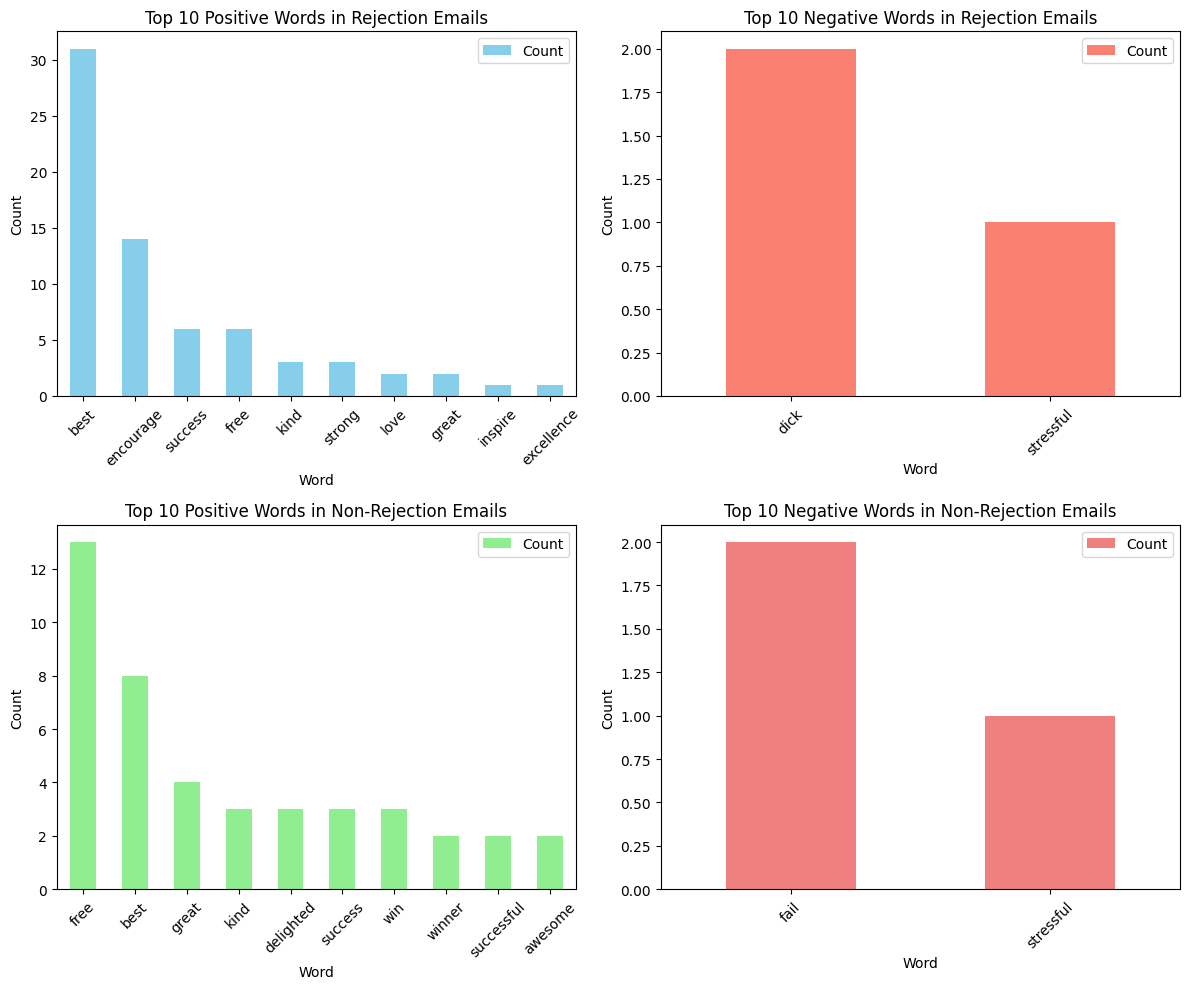

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Initialize empty counters for positive and negative words
positive_words_rejection = []
negative_words_rejection = []
positive_words_non_rejection = []
negative_words_non_rejection = []

# Iterate through each email's tokens and analyze sentiment
for tokens, status in zip(df['Tokens'], df['Status']):
    for token in tokens:
        sentiment_score = sid.polarity_scores(token)
        if sentiment_score['compound'] > 0.5:
            if status == 'reject':
                positive_words_rejection.append(token)
            else:
                positive_words_non_rejection.append(token)
        elif sentiment_score['compound'] < -0.5:
            if status == 'reject':
                negative_words_rejection.append(token)
            else:
                negative_words_non_rejection.append(token)

# Count the occurrences of each positive and negative word separately for rejection and non-rejection emails
positive_word_counts_rejection = Counter(positive_words_rejection)
negative_word_counts_rejection = Counter(negative_words_rejection)
positive_word_counts_non_rejection = Counter(positive_words_non_rejection)
negative_word_counts_non_rejection = Counter(negative_words_non_rejection)

# Plot bar charts for each word individually
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

# Plot bar chart for positive words in rejection emails
word_counts_rejection_df = pd.DataFrame(positive_word_counts_rejection.most_common(10), columns=['Word', 'Count'])
word_counts_rejection_df.plot(kind='bar', x='Word', y='Count', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 10 Positive Words in Rejection Emails')
axes[0, 0].set_xlabel('Word')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot bar chart for negative words in rejection emails
word_counts_rejection_df = pd.DataFrame(negative_word_counts_rejection.most_common(10), columns=['Word', 'Count'])
word_counts_rejection_df.plot(kind='bar', x='Word', y='Count', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Top 10 Negative Words in Rejection Emails')
axes[0, 1].set_xlabel('Word')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot bar chart for positive words in non-rejection emails
word_counts_non_rejection_df = pd.DataFrame(positive_word_counts_non_rejection.most_common(10), columns=['Word', 'Count'])
word_counts_non_rejection_df.plot(kind='bar', x='Word', y='Count', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Top 10 Positive Words in Non-Rejection Emails')
axes[1, 0].set_xlabel('Word')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot bar chart for negative words in non-rejection emails
word_counts_non_rejection_df = pd.DataFrame(negative_word_counts_non_rejection.most_common(10), columns=['Word', 'Count'])
word_counts_non_rejection_df.plot(kind='bar', x='Word', y='Count', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Top 10 Negative Words in Non-Rejection Emails')
axes[1, 1].set_xlabel('Word')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Looking at the sentiment analysis, there werent many negative words for rejection emails which makes sense.
This is because professional emails dont have emotive negative words.

Looking at the positive words for rejection emails there were a lot of words used, which made sense but was not an area I deemed necessary to further explore.
This is because such wording was present in non rejection emails too.

# Word Analysis 1.43
## Exploring the Phrase 'Thank You'

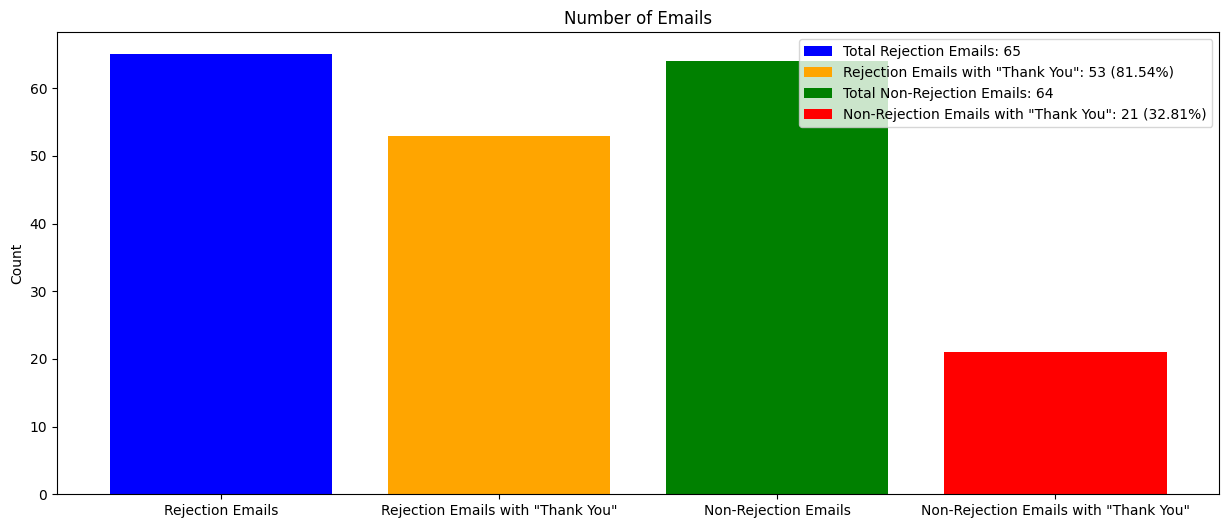

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert tokens to lowercase strings
df['Tokens'] = df['Tokens'].apply(lambda x: [token.lower() for token in x])

# Join tokens into a single string for each email
df['tokens_str'] = df['Tokens'].apply(' '.join)

# Filter rejection emails containing "thank you" in the tokens
rejection_with_thank_you = df[(df['Status'] == 'reject') & df['tokens_str'].str.contains(r'\bthank\s+you\b', case=False, regex=True)]

# Filter non-rejection emails containing "thank you" in the tokens
non_rejection_with_thank_you = df[(df['Status'] == 'not_reject') & df['tokens_str'].str.contains(r'\bthank\s+you\b', case=False, regex=True)]

# Calculate the count of rejection emails containing "thank you"
count_thank_you_rejections = len(rejection_with_thank_you)

# Calculate the count of non-rejection emails containing "thank you"
count_thank_you_non_rejections = len(non_rejection_with_thank_you)

# Calculate the total count of rejection emails
total_rejections = len(df[df['Status'] == 'reject'])

# Calculate the total count of non-rejection emails
total_non_rejections = len(df[df['Status'] == 'not_reject'])

# Calculate the percentage of rejection emails containing "thank you"
percent_thank_you_rejections = (count_thank_you_rejections / total_rejections) * 100

# Calculate the percentage of non-rejection emails containing "thank you"
percent_thank_you_non_rejections = (count_thank_you_non_rejections / total_non_rejections) * 100

# Plotting
plt.figure(figsize=(15, 6))  # Adjust the figure size here (width, height)
plt.bar('Rejection Emails', total_rejections, color='blue', label=f'Total Rejection Emails: {total_rejections}')
plt.bar('Rejection Emails with "Thank You"', count_thank_you_rejections, color='orange', label=f'Rejection Emails with "Thank You": {count_thank_you_rejections} ({percent_thank_you_rejections:.2f}%)')
plt.bar('Non-Rejection Emails', total_non_rejections, color='green', label=f'Total Non-Rejection Emails: {total_non_rejections}')
plt.bar('Non-Rejection Emails with "Thank You"', count_thank_you_non_rejections, color='red', label=f'Non-Rejection Emails with "Thank You": {count_thank_you_non_rejections} ({percent_thank_you_non_rejections:.2f}%)')
plt.title('Number of Emails')
plt.ylabel('Count')
plt.legend()
plt.show()


Above we can see that 81.54% of rejection emails have 'Thank you' in them suggesting a massive pattern here.
Additionally, we recognise even further that this is a strong pattern because in not_reject emails the phrase only occurs 32.81% of the time which is much lower.
